# Cross-correlation


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import scipy.integrate as integrate
%matplotlib inline


The cross-correlation between two functions, defined as:

\begin{equation}
(f\star g) (\tau) = \int_{-\infty}^{\infty} f^*(t) g(t+\tau) dt 
\end{equation}

Usually it's compute using the Fourier transform since the cross-correlation satisfy the **convolution theorem**:

\begin{equation}
\mathcal{F}[f\star g] = \mathcal{F}[f]^* \mathcal{F}[g]
\end{equation}

## Example: 

Consider the following function:
\begin{equation*}
f(x) = \begin{cases}
1 \quad |x| < 1\\
0 \quad \text{otherwise}
\end{cases}
\end{equation*}

The cross-correlation of $f$ with itself is simply:
\begin{equation*}
(f\star f)(x) = \begin{cases}
2-x \quad &0 \leq x < 2\\
2+x \quad &-2 < x < 0\\
0 \quad &\text{otherwise}
\end{cases}
\end{equation*}

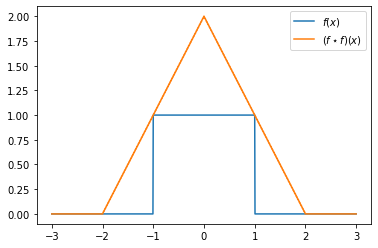

In [3]:
sqr = lambda x:np.piecewise(x,[np.abs(x)<=1,np.abs(x)>1],[1,0])
def acsqr(x):
    N = 1000
    t = np.linspace(-5,5,num=N)
    return np.dot(sqr(t),sqr(t+x))*(10/N) #numerical integration
acsqr = np.vectorize(acsqr)
x = np.linspace(-3,3,num=1000)

plt.plot(x,sqr(x),label='$f(x)$')
plt.plot(x,acsqr(x),label='$(f\star f)(x)$')
plt.legend()

Another way to compute the cross-correlation is to compute the fourier transform of the waveform. We first plot the Fourier transform of the signal 

\begin{align*}
\mathcal{F}[f](k) = \sqrt{\frac{2}{\pi}} \frac{\sin k}{k}
\end{align*}

C:\Users\chany\miniconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


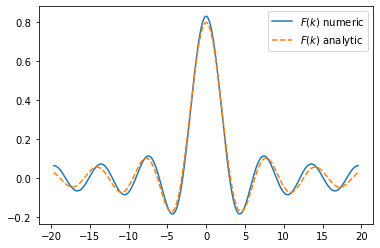

In [7]:
def FourierTransform(func,x1=-10,x2=10,N=100):
    n = np.arange(N)
    k = 2*np.pi*n/(x2-x1)
    fft = np.fft.fft(func(x1+(x2-x1)*n/N))*np.exp(-(0+1j)*k*x1)*(x2-x1)/(N*np.sqrt(2.0*np.pi))
    fft = np.concatenate((fft[int(N/2):N],fft[0:int(N/2)]))
    return (k-k[int(N/2)],fft)

plt.cla()
k,fft = FourierTransform(sqr,N=1000,x1=-80,x2=80)
plt.plot(k,fft,label='$F(k)$ numeric')
plt.plot(k,np.sqrt(2/np.pi)*np.sinc(k/np.pi),'--',label='$F(k)$ analytic')
plt.legend()

Now we can calculate the convolution of the function simply by finding the ampltitude square of the fourier transform and compute it's inverse 

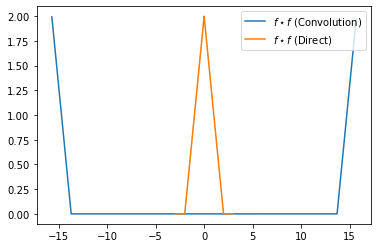

In [5]:
fft_sq = np.abs(fft)**2
plt.cla()
k,conv_sq = FourierTransform(lambda x: 2*np.sqrt(2/np.pi)*np.sinc(x/np.pi)**2,N=1000,x1=-100,x2=100)
plt.plot(k,np.real(conv_sq),label='$f\star f$ (Convolution)')
plt.plot(x,acsqr(x),label='$f\star f$ (Direct)')
plt.legend()
plt.show()

**The normalization constant is somehow off, need to investigate further**